# Task 1
Task: Use any unsupervised technique to extract patterns or segregate data into groups.
User Story: User should be able to provide a data point (a row) and program should be able to identify
to which group given data point belongs to and why?

In [ ]:
import pandas as pd
import numpy as np 

In [62]:
data = pd.read_csv(r'Online Retail.csv')

In [63]:
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
195462,553718,23174,REGENCY SUGAR BOWL GREEN,3,5/18/2011 16:14,8.29,NaN,United Kingdom
414142,572344,M,Manual,48,10/24/2011 10:43,1.50,14607.0,United Kingdom
479952,577228,22562,MONSTERS STENCIL CRAFT,1,11/18/2011 12:07,1.25,12391.0,Cyprus
388441,570428,22044,CHRISTMAS CARD STACK OF PRESENTS,24,10/10/2011 14:02,0.19,15553.0,United Kingdom
451060,575177,47593B,SCOTTIE DOGS BABY BIB,2,11/8/2011 18:41,0.83,NaN,United Kingdom


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [65]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [66]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [67]:
data = data.dropna()

# Encoding

In [68]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Encode the 'date_column' as numeric representation
#data['encoded_date'] = data['InvoiceDate'].astype('int64').astype(int)
data['InvoiceDate'] = data['InvoiceDate'].astype('int64') // 10**9

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()
data['Country'] = pd.DataFrame(le.fit_transform(data['Country']))

In [72]:
data = data.dropna()
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
202114,554363,21936,RED RETROSPOT PICNIC BAG,10,1306232340,2.95,12647.0,35.0
296401,562892,23297,SET 40 HEART SHAPE PETIT FOUR CASES,16,1312979040,1.65,16292.0,35.0
257341,559525,21210,SET OF 72 RETROSPOT PAPER DOILIES,4,1310293800,1.45,16923.0,35.0
139353,548312,47566,PARTY BUNTING,2,1301487120,4.95,16059.0,35.0
291530,562457,22716,CARD CIRCUS PARADE,12,1312542000,0.42,18079.0,13.0
195276,553710,47591D,PINK FAIRY CAKE CHILDRENS APRON,3,1305732900,1.95,17338.0,35.0
334186,566233,22303,COFFEE MUG APPLES DESIGN,6,1315739040,2.55,12635.0,35.0
281898,561610,22621,TRADITIONAL KNITTING NANCY,12,1311856080,1.65,16076.0,26.0
218241,556032,22669,RED BABY BUNTING,5,1307536500,2.95,15159.0,35.0
128772,547359,20974,12 PENCILS SMALL TUBE SKULL,3,1300796820,0.65,15719.0,35.0


In [74]:
data['Description'].nunique()

3782

In [78]:
data['Description'] = pd.DataFrame(le.fit_transform(data['Description']))
data = data.dropna()
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
54059,540849,22904,134.0,6,1294824780,2.95,14270.0,35.0
172753,551558,22757,3456.0,1,1304419260,1.25,17841.0,35.0
266048,560240,21714,3457.0,6,1310903940,1.25,15716.0,35.0
162699,550515,21340,3456.0,1,1303147740,12.75,14502.0,35.0
2364,536584,84029E,3353.0,384,1291220520,2.95,13777.0,35.0
222378,556425,22315,3457.0,1,1307710260,1.25,14178.0,35.0
176909,552038,21977,3456.0,240,1304669280,0.42,14156.0,35.0
113893,545999,22662,3455.0,10,1299595440,1.65,13089.0,35.0
215618,555726,23204,3456.0,10,1307377380,0.85,12540.0,23.0
213516,555545,23206,3456.0,10,1307279280,1.65,17735.0,35.0


In [80]:
data = data.drop(['InvoiceNo','StockCode'], axis = 1)
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,3300.0,6,1291191960,2.55,17850.0,35.0
1,3307.0,6,1291191960,3.39,17850.0,35.0
2,772.0,8,1291191960,2.75,17850.0,35.0
3,1618.0,6,1291191960,3.39,17850.0,35.0
4,2459.0,6,1291191960,3.39,17850.0,35.0


# Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

normalized_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

# Train test split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test = train_test_split(normalized_data, test_size = 0.1, random_state = 0)

# Clustering

In [91]:
from sklearn.cluster import KMeans

In [96]:
kmeans = KMeans(random_state=42)

kmeans.fit(X_train)

C:\Users\parul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

## Prediction

In [97]:
kmeans.predict(X_test)

array([5, 5, 3, ..., 7, 7, 3])

# Visualising cluster centers

In [98]:
import matplotlib.pyplot as plt

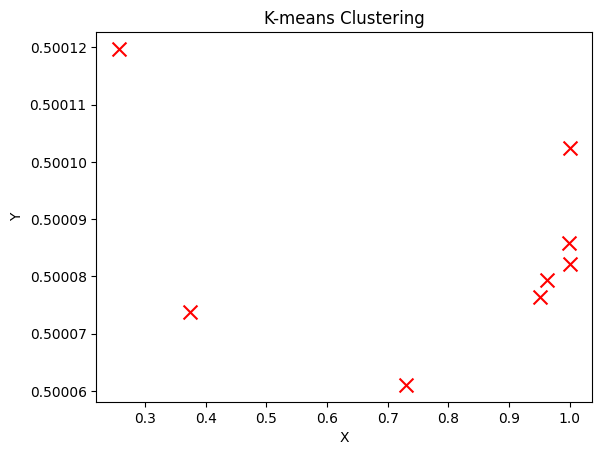

In [101]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=100)

plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()